<a href="https://colab.research.google.com/github/hksantosh/eip/blob/master/week3/Assignment%203_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import utils

from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

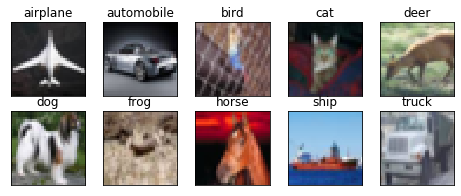

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history. history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)

In [8]:
 # Define the mymodel
mymodel = Sequential()
mymodel.add(SeparableConv2D(32, 3, padding='same', input_shape=(32, 32, 3))) #32
mymodel.add(Activation('relu'))
mymodel.add(SeparableConv2D(32, 3)) #30
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2))) #15
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(32, 3, padding='same')) #15
mymodel.add(Activation('relu'))
mymodel.add(SeparableConv2D(32, 3)) #13
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2))) #6
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(SeparableConv2D(64, 3, padding='same')) #6
mymodel.add(Activation('relu'))
mymodel.add(SeparableConv2D(64, 3)) #4
mymodel.add(Activation('relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2))) #2
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.1))

mymodel.add(Flatten())
mymodel.add(Dense(256))
mymodel.add(Activation('relu'))
mymodel.add(BatchNormalization())
mymodel.add(Dropout(0.05))

mymodel.add(Dense(num_classes, activation='softmax'))
# Compile the mymodel
mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 32, 32, 32)        155       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 30, 30, 32)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0

Epoch 1/50
782/781 [==============================] - 69s 88ms/step - loss: 1.6976 - accuracy: 0.3901 - val_loss: 1.9540 - val_accuracy: 0.3380
Epoch 2/50
782/781 [==============================] - 69s 88ms/step - loss: 1.3691 - accuracy: 0.5052 - val_loss: 1.5352 - val_accuracy: 0.4850
Epoch 3/50
782/781 [==============================] - 67s 86ms/step - loss: 1.2307 - accuracy: 0.5565 - val_loss: 1.2850 - val_accuracy: 0.5396
Epoch 4/50
782/781 [==============================] - 67s 86ms/step - loss: 1.1414 - accuracy: 0.5928 - val_loss: 2.0136 - val_accuracy: 0.3963
Epoch 5/50
782/781 [==============================] - 68s 86ms/step - loss: 1.0765 - accuracy: 0.6174 - val_loss: 1.3416 - val_accuracy: 0.5476
Epoch 6/50
782/781 [==============================] - 68s 87ms/step - loss: 1.0182 - accuracy: 0.6397 - val_loss: 1.1115 - val_accuracy: 0.6074
Epoch 7/50
782/781 [==============================] - 68s 88ms/step - loss: 0.9642 - accuracy: 0.6577 - val_loss: 1.1949 - val_accuracy:

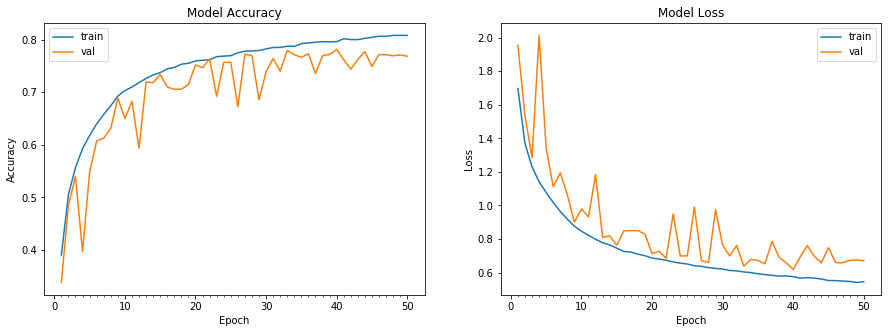

Accuracy on test data is: 76.85


In [9]:
datagen = ImageDataGenerator(zoom_range=0.0, horizontal_flip=True)

# train the mymodel
start = time.time()
# Train the mymodel
mymodel_info = mymodel.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64), steps_per_epoch=train_features.shape[0]/64,
                                 epochs = 50, validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("mymodel took %0.2f seconds to train"%(end - start))

# plot mymodel history
plot_model_history(mymodel_info)

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, mymodel))